# Data Science for Cycling #1 - How To Read GPX Strava Routes With Python
- Notebook 1/6
- Make sure to have `gpxpy` installed:
<br>

```
pip install gpxpy
```

- Let's import the libraries and tweak Matplotlib's default stylings:

In [44]:
import gpxpy
import gpxpy.gpx
from datetime import datetime
from pytz import timezone
import elevation
import geocoder

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

- You can read GPX files with Python's context manager syntax:

- It's a specific GPX object:

In [3]:
gpx

GPX(tracks=[GPXTrack(segments=[GPXTrackSegment(points=[...])])])

- Get the number of data points (number of times geolocation was taken):

In [4]:
gpx.get_track_points_no()

5994

- Get the minimum and maximum altitudes:

In [5]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=480.8, maximum=1659.9)

- Get the number of meters of uphil and downhil ride
- It's a roundtrip, so the numbers should be almost identical

In [6]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=2953.5000000000055, downhill=2381.9000000000096)

- You can dump the entire GPX file to XML
- Here are the first 1000 characters:

In [7]:
gpx.to_xml()[:1000]

'<?xml version="1.0" encoding="UTF-8"?>\n<gpx xmlns="http://www.topografix.com/GPX/1/1" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd" version="1.1" creator="StravaGPX">\n  <metadata>\n    <time>2013-07-13T06:41:38Z</time>\n  </metadata>\n  <trk>\n    <trkseg>\n      <trkpt lat="46.363649" lon="14.112036">\n        <ele>511.5</ele>\n        <time>2013-07-13T06:41:38Z</time>\n      </trkpt>\n      <trkpt lat="46.363691" lon="14.112026">\n        <ele>511.0</ele>\n        <time>2013-07-13T06:41:39Z</time>\n      </trkpt>\n      <trkpt lat="46.363778" lon="14.112031">\n        <ele>510.1</ele>\n        <time>2013-07-13T06:41:41Z</time>\n      </trkpt>\n      <trkpt lat="46.363835" lon="14.112023">\n        <ele>509.7</ele>\n        <time>2013-07-13T06:41:43Z</time>\n      </trkpt>\n      <trkpt lat="46.363888" lon="14.112007">\n        <ele>509.4</ele>\n        <time>2013-07-13T06:41:45

<br>

## Basic analysis
- There's only one track available in the file
- Access it with Python's list indexing syntax:

In [8]:
gpx.tracks[0]

GPXTrack(segments=[GPXTrackSegment(points=[...])])

- The track has only one segment - access it the same way:

In [9]:
gpx.tracks[0].segments[0]

GPXTrackSegment(points=[...])

- The segment has 835 data points
- Here are the first 10:

In [10]:
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(46.363649, 14.112036, elevation=511.5, time=datetime.datetime(2013, 7, 13, 6, 41, 38, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.363691, 14.112026, elevation=511.0, time=datetime.datetime(2013, 7, 13, 6, 41, 39, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.363778, 14.112031, elevation=510.1, time=datetime.datetime(2013, 7, 13, 6, 41, 41, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.363835, 14.112023, elevation=509.7, time=datetime.datetime(2013, 7, 13, 6, 41, 43, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.363888, 14.112007, elevation=509.4, time=datetime.datetime(2013, 7, 13, 6, 41, 45, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.363943, 14.111994, elevation=509.0, time=datetime.datetime(2013, 7, 13, 6, 41, 47, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.363987, 14.111986, elevation=508.7, time=datetime.datetime(2013, 7, 13, 6, 41, 49, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(46.364034, 14.11198, elevation=508.4, time=datetime.datetime(2013, 7, 13, 6, 41, 51, tzinfo=SimpleTZ("Z"))),
 

- Let's now extract all dat apoints
- Store latitude, longitude, and elevation as a list of dicts

In [17]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [18]:
route_info[:3]

[{'latitude': 46.363649, 'longitude': 14.112036, 'elevation': 511.5},
 {'latitude': 46.363691, 'longitude': 14.112026, 'elevation': 511.0},
 {'latitude': 46.363778, 'longitude': 14.112031, 'elevation': 510.1}]

- Convert it to Pandas DataFrame for faster and easier analysis

In [19]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,46.363649,14.112036,511.5
1,46.363691,14.112026,511.0
2,46.363778,14.112031,510.1
3,46.363835,14.112023,509.7
4,46.363888,14.112007,509.4


- Save it to CSV for later use:

In [21]:
route_df.to_csv('route_df.csv', index=False)

<br>

## Basic visualization
- You can use matplotlib to visualize all data points
- It won't show the map, but you should still see how the route looks like:

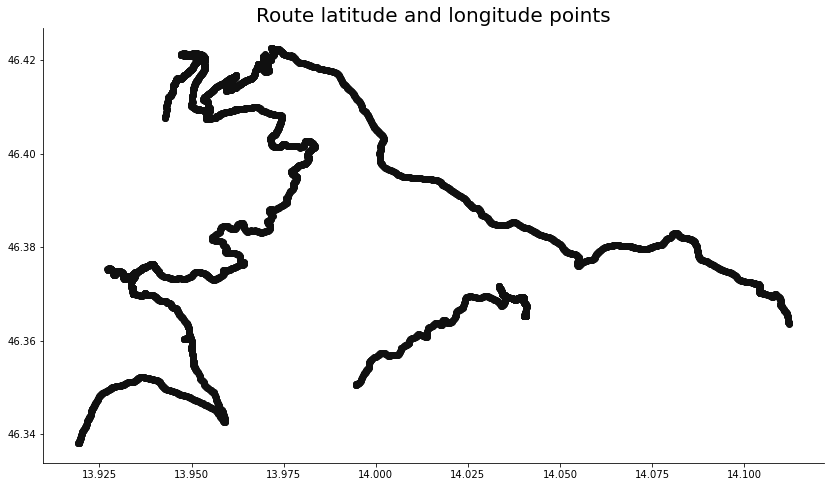

In [22]:
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

- You'll see in the following notebook how to visualize the route on a map with Folium